<a href="https://colab.research.google.com/github/Udzf/EV/blob/main/Fuel_type_in_Switzerland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.9 MB/s eta 0:00:00


In [6]:
!pip install pyjstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.0/798.0 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyjstat: filename=pyjstat-2.4.0-py3-none-any.whl size=22763 sha256=0d47eb20171102a22189662bd262e639306b7f47b9f4edec1dc68110e907b713
  Stored in directory: /root/.cache/pip/wheels/d7/b0/ac/350c026feabb6a22b2a5b3fb1f694e724c0f57c2c43ccaf738
Successfully built pyjstat


In [7]:
import requests
import json
from pyjstat import pyjstat
import pandas as pd
import io

# Data Presentation




## Percentage of EV in Switzerland

In [8]:
# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {
    "query": [
        {
            "code": "Kanton",
            "selection": {
                "filter": "item",
                "values": ["0"]
            }
        },
        {
            "code": "Treibstoff",
            "selection": {
                "filter": "item",
                "values": ["100", "200", "300", "9900", "9999"]
            }
        }
    ],
    "response": {
        "format": "json-stat"
    }
}

# Send POST request
headers = {
    "Content-Type": "application/json"
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    df = dataset.write('dataframe')

    print(df.head())
else:
    print(f"Request failed: {response.status_code}\n{response.text}")

        Canton Vehicle group / type    Fuel  Year    value
0  Switzerland     > Passenger cars  Petrol  1990  2905762
1  Switzerland     > Passenger cars  Petrol  1991  2975154
2  Switzerland     > Passenger cars  Petrol  1992  3006666
3  Switzerland     > Passenger cars  Petrol  1993  3022762
4  Switzerland     > Passenger cars  Petrol  1994  3073062


In [9]:
df.head(30)

,Canton,Vehicle group / type,Fuel,Year,value
0,Switzerland,> Passenger cars,Petrol,1990,2905762
1,Switzerland,> Passenger cars,Petrol,1991,2975154
2,Switzerland,> Passenger cars,Petrol,1992,3006666
3,Switzerland,> Passenger cars,Petrol,1993,3022762
4,Switzerland,> Passenger cars,Petrol,1994,3073062
5,Switzerland,> Passenger cars,Petrol,1995,3132238
6,Switzerland,> Passenger cars,Petrol,1996,3166299
7,Switzerland,> Passenger cars,Petrol,1997,3216484
8,Switzerland,> Passenger cars,Petrol,1998,3269402
9,Switzerland,> Passenger cars,Petrol,1999,3342265


In [10]:
# Create a list of the desired values
desired_values = ["> Passenger cars", "> Passenger vehicles", "> Goods vehicles", "> Agricultural vehicles", "> Industrial vehicles", "> Motorcycles"]

# Filter the DataFrame
filtered_df = df[df['Vehicle group / type'].isin(desired_values)]

# Update the original DataFrame
df = filtered_df

In [11]:
print(df['Vehicle group / type'].unique().tolist())

['> Passenger cars', '> Passenger vehicles', '> Goods vehicles', '> Agricultural vehicles', '> Industrial vehicles', '> Motorcycles']


In [12]:
filtered_df = df[(df['Fuel'] == 'Without motor') & (df['value'] > 0)]
vehicle_groups = filtered_df['Vehicle group / type'].unique().tolist()

print(vehicle_groups)

[]


In [13]:
# Get the unique values from vehicle_groups
vehicle_groups_unique = set(vehicle_groups)

# Filter the DataFrame to exclude rows in vehicle_groups_unique
filtered_df = df[~df['Vehicle group / type'].isin(vehicle_groups_unique)]

# Update the original DataFrame
df = filtered_df

In [14]:
print(df.tail())

           Canton Vehicle group / type           Fuel  Year  value
4545  Switzerland        > Motorcycles  Without motor  2020      0
4546  Switzerland        > Motorcycles  Without motor  2021      0
4547  Switzerland        > Motorcycles  Without motor  2022      0
4548  Switzerland        > Motorcycles  Without motor  2023      0
4549  Switzerland        > Motorcycles  Without motor  2024      0


In [15]:
# Filter the DataFrame to exclude rows where Fuel is "Without motor"
filtered_df = df[df['Fuel'] != 'Without motor']

# Update the original DataFrame
df = filtered_df

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 840 entries, 0 to 4514
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Canton                840 non-null    object
 1   Vehicle group / type  840 non-null    object
 2   Fuel                  840 non-null    object
 3   Year                  840 non-null    object
 4   value                 840 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 39.4+ KB


In [17]:
print(df)

           Canton Vehicle group / type    Fuel  Year    value
0     Switzerland     > Passenger cars  Petrol  1990  2905762
1     Switzerland     > Passenger cars  Petrol  1991  2975154
2     Switzerland     > Passenger cars  Petrol  1992  3006666
3     Switzerland     > Passenger cars  Petrol  1993  3022762
4     Switzerland     > Passenger cars  Petrol  1994  3073062
...           ...                  ...     ...   ...      ...
4510  Switzerland        > Motorcycles   Other  2020      133
4511  Switzerland        > Motorcycles   Other  2021      225
4512  Switzerland        > Motorcycles   Other  2022      223
4513  Switzerland        > Motorcycles   Other  2023     1089
4514  Switzerland        > Motorcycles   Other  2024     1061

[840 rows x 5 columns]


In [18]:
electricity_sums_by_year = df[df['Fuel'] == 'Electricity'].groupby('Year')['value'].sum() / df.groupby('Year')['value'].sum()

# Convert the result to a DataFrame
electricity_sums_by_year = electricity_sums_by_year.to_frame(name='% of EV')



In [19]:
# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year = electricity_sums_by_year.rename(columns={'Year': 'Year'})  # Renaming the existing index to 'Year'

electricity_sums_by_year = electricity_sums_by_year.reset_index()  # Resetting the index to make 'Year' a regular column

In [20]:
# Display the result
print(electricity_sums_by_year)

    Year   % of EV
0   1990  0.000977
1   1991  0.001172
2   1992  0.001223
3   1993  0.001237
4   1994  0.001212
5   1995  0.001174
6   1996  0.001150
7   1997  0.001140
8   1998  0.001132
9   1999  0.001142
10  2000  0.001132
11  2001  0.001104
12  2002  0.001104
13  2003  0.001089
14  2004  0.000969
15  2005  0.000936
16  2006  0.000912
17  2007  0.000899
18  2008  0.000933
19  2009  0.001034
20  2010  0.001240
21  2011  0.001656
22  2012  0.002243
23  2013  0.002691
24  2014  0.003190
25  2015  0.003832
26  2016  0.004397
27  2017  0.005072
28  2018  0.005969
29  2019  0.007772
30  2020  0.010341
31  2021  0.015237
32  2022  0.022183
33  2023  0.029766
34  2024  0.037639


In [21]:
electricity_sums_by_year.columns.tolist()

['Year', '% of EV']

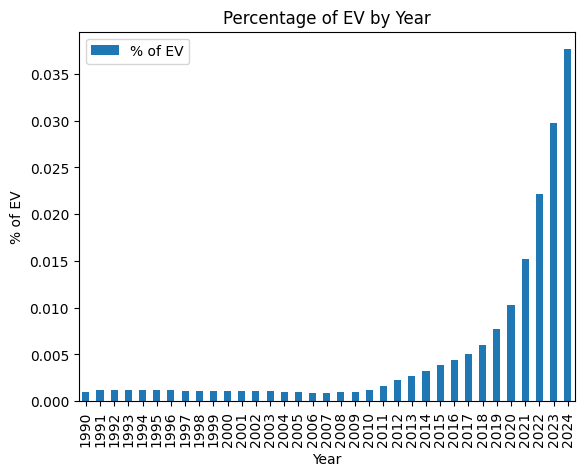

In [22]:
import matplotlib.pyplot as plt

# Assuming electricity_sums_by_year is your DataFrame
electricity_sums_by_year.plot(x='Year', y='% of EV', kind='bar')
plt.xlabel('Year')
plt.ylabel('% of EV')
plt.title('Percentage of EV by Year')
plt.show()

In [23]:
# Reset the index to make 'Fuel' and 'Year' regular columns
df_grouped = df.reset_index()

# Select the desired columns
df_grouped = df_grouped[['Fuel', 'Year', 'Canton', 'Vehicle group / type', 'value']]

# Optional: Sort the DataFrame by 'Fuel' and 'Year'
df_grouped = df_grouped.sort_values(by=['Fuel', 'Year'])



In [24]:
# Reset the index to make 'Fuel' and 'Year' regular columns
df_grouped = df.reset_index()

# Select the desired columns with 'Year' first
df_grouped = df_grouped[['Year', 'Fuel', 'Canton', 'Vehicle group / type', 'value']]

# Optional: Sort the DataFrame by 'Fuel' and 'Year'
df_grouped = df_grouped.sort_values(by=['Fuel', 'Year'])

# Display the result
print(df_grouped)

     Year    Fuel       Canton     Vehicle group / type   value
35   1990  Diesel  Switzerland         > Passenger cars   79129
175  1990  Diesel  Switzerland     > Passenger vehicles   12747
315  1990  Diesel  Switzerland         > Goods vehicles   99436
455  1990  Diesel  Switzerland  > Agricultural vehicles  149245
595  1990  Diesel  Switzerland    > Industrial vehicles   35734
..    ...     ...          ...                      ...     ...
174  2024  Petrol  Switzerland     > Passenger vehicles    8149
314  2024  Petrol  Switzerland         > Goods vehicles   57082
454  2024  Petrol  Switzerland  > Agricultural vehicles   13111
594  2024  Petrol  Switzerland    > Industrial vehicles    6797
734  2024  Petrol  Switzerland            > Motorcycles  783535

[840 rows x 5 columns]


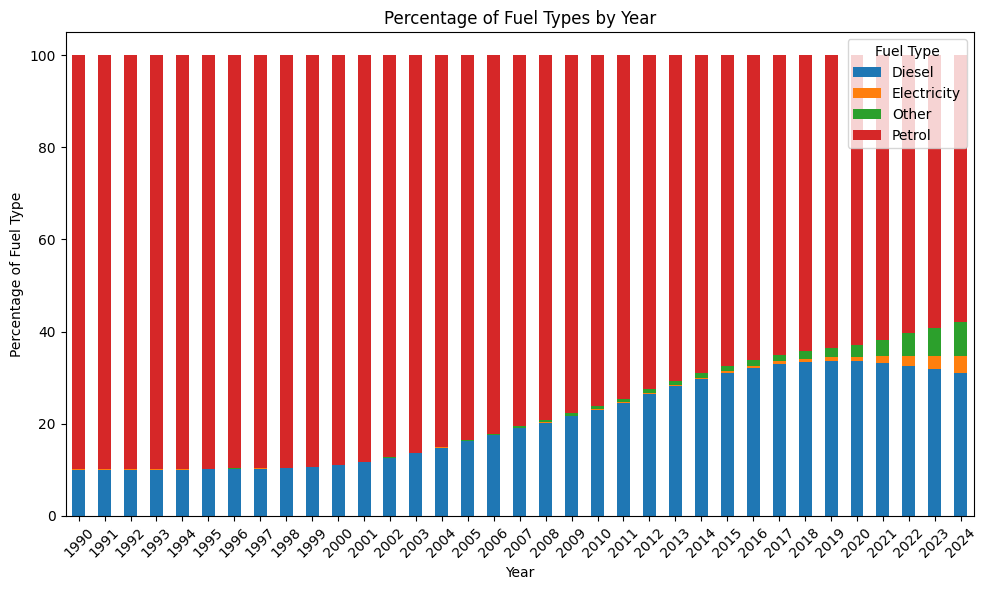

In [25]:
import matplotlib.pyplot as plt

# Group by 'Year' and 'Fuel' and calculate the sum of 'Value'
fuel_year_sums = df_grouped.groupby(['Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each year
year_totals = fuel_year_sums.groupby('Year')['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
fuel_year_sums = pd.merge(fuel_year_sums, year_totals, on='Year', suffixes=('', '_total'))
fuel_year_sums['Percentage'] = (fuel_year_sums['value'] / fuel_year_sums['value_total']) * 100

# Pivot the DataFrame to have 'Fuel' as columns and 'Percentage' as values
fuel_percentage_by_year = fuel_year_sums.pivot(index='Year', columns='Fuel', values='Percentage')

# Create the plot
fuel_percentage_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))  # Adjust figsize as needed
plt.xlabel('Year')
plt.ylabel('Percentage of Fuel Type')
plt.title('Percentage of Fuel Types by Year')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [26]:
percentage_electricity_2024 = fuel_percentage_by_year.loc[fuel_percentage_by_year.index == '2024', 'Electricity'].values[0]
print(f"Percentage of Electricity in 2024: {percentage_electricity_2024:.2f}%")

Percentage of Electricity in 2024: 3.76%


## Percentage of EV per Canton

In [27]:

# API URL
url = "https://www.pxweb.bfs.admin.ch/api/v1/en/px-x-1103020100_101/px-x-1103020100_101.px"

# JSON query body
query = {

  "query": [
    {
      "code": "Kanton",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26"
        ]
      }
    },
    {
      "code": "Fahrzeuggruppe / -art",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "400",
          "500",
          "600"
        ]
      }
    },
    {
      "code": "Treibstoff",
      "selection": {
        "filter": "item",
        "values": [
          "100",
          "200",
          "300",
          "9900"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat"
  }
}

response = requests.post(url, headers=headers, data=json.dumps(query))

# Handle the response
if response.status_code == 200:
    result = response.json()

    # Parse JSON-stat to DataFrame
    dataset = pyjstat.Dataset.read(json.dumps(result))
    Canton_data = dataset.write('dataframe')

    print(Canton_data.head())
else:
    print(f"Request failed: {response.status_code}\n{response.text}")

   Canton Vehicle group / type    Fuel  Year   value
0  Zürich     > Passenger cars  Petrol  1990  502276
1  Zürich     > Passenger cars  Petrol  1991  508601
2  Zürich     > Passenger cars  Petrol  1992  511444
3  Zürich     > Passenger cars  Petrol  1993  510469
4  Zürich     > Passenger cars  Petrol  1994  516556


In [28]:
# Group by 'Canton', 'Year', and 'Fuel' and calculate the sum of 'Value'
canton_year_fuel_sums = Canton_data.groupby(['Canton', 'Year', 'Fuel'])['value'].sum().reset_index()

# Calculate the total sum of 'Value' for each Canton and year
canton_year_totals = canton_year_fuel_sums.groupby(['Canton', 'Year'])['value'].sum().reset_index()

# Merge the two DataFrames to calculate the percentage
canton_year_fuel_sums = pd.merge(canton_year_fuel_sums, canton_year_totals, on=['Canton', 'Year'], suffixes=('', '_total'))
canton_year_fuel_sums['Percentage'] = (canton_year_fuel_sums['value'] / canton_year_fuel_sums['value_total']) * 100

# Filter for 'Electricity' fuel type
electricity_percentage_by_canton_year = canton_year_fuel_sums[canton_year_fuel_sums['Fuel'] == 'Electricity']

# Display the result
print(electricity_percentage_by_canton_year[['Canton', 'Year', 'Percentage']])

      Canton  Year  Percentage
1     Aargau  1990    0.054071
5     Aargau  1991    0.071048
9     Aargau  1992    0.074000
13    Aargau  1993    0.071670
17    Aargau  1994    0.065901
...      ...   ...         ...
3621  Zürich  2020    1.332480
3625  Zürich  2021    1.927696
3629  Zürich  2022    2.746738
3633  Zürich  2023    3.726824
3637  Zürich  2024    4.779282

[910 rows x 3 columns]


In [29]:
# Find the canton with the highest percentage
highest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmax(), 'Canton']


# Find the canton with the lowest percentage
lowest_canton = electricity_percentage_by_canton_year.loc[electricity_percentage_by_canton_year['Percentage'].idxmin(), 'Canton']

print(f"Canton with the highest percentage: {highest_canton}")
print(f"Canton with the lowest percentage: {lowest_canton}")

Canton with the highest percentage: Zug
Canton with the lowest percentage: Appenzell-Innerrhoden


In [30]:
# Sort by Percentage in descending order, get the top 2 unique cantons, and convert to a list
highest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=False)['Canton'].unique()[:2].tolist()

# Sort by Percentage in ascending order, get the top 2 unique cantons, and convert to a list
lowest_cantons = electricity_percentage_by_canton_year.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the highest percentage: {highest_cantons}")
print(f"Cantons with the lowest percentage: {lowest_cantons}")

Cantons with the highest percentage: ['Zug', 'Zürich']
Cantons with the lowest percentage: ['Appenzell-Innerrhoden', 'Jura']


In [31]:
print(electricity_percentage_by_canton_year)

      Canton  Year         Fuel  value  value_total  Percentage
1     Aargau  1990  Electricity    156       288512    0.054071
5     Aargau  1991  Electricity    211       296981    0.071048
9     Aargau  1992  Electricity    224       302702    0.074000
13    Aargau  1993  Electricity    220       306964    0.071670
17    Aargau  1994  Electricity    207       314108    0.065901
...      ...   ...          ...    ...          ...         ...
3621  Zürich  2020  Electricity  12931       970446    1.332480
3625  Zürich  2021  Electricity  18987       984958    1.927696
3629  Zürich  2022  Electricity  27127       987608    2.746738
3633  Zürich  2023  Electricity  37277      1000235    3.726824
3637  Zürich  2024  Electricity  48156      1007599    4.779282

[910 rows x 6 columns]


In [32]:
electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])
electricity_percentage_by_canton_year_2010 = electricity_percentage_by_canton_year[
    (electricity_percentage_by_canton_year['Year'] >= 2007) & (electricity_percentage_by_canton_year['Year'] <= 2022)
]

<ipython-input-32-9c8147e9e7b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electricity_percentage_by_canton_year['Year'] = pd.to_numeric(electricity_percentage_by_canton_year['Year'])


In [33]:
print(electricity_percentage_by_canton_year_2010.head(20))

                     Canton  Year         Fuel  value  value_total  Percentage
69                   Aargau  2007  Electricity    169       417742    0.040456
73                   Aargau  2008  Electricity    203       424718    0.047796
77                   Aargau  2009  Electricity    240       428203    0.056048
81                   Aargau  2010  Electricity    292       440480    0.066291
85                   Aargau  2011  Electricity    333       452282    0.073627
89                   Aargau  2012  Electricity    470       463958    0.101302
93                   Aargau  2013  Electricity    566       473792    0.119462
97                   Aargau  2014  Electricity    769       483150    0.159164
101                  Aargau  2015  Electricity   1066       490185    0.217469
105                  Aargau  2016  Electricity   1429       498194    0.286836
109                  Aargau  2017  Electricity   1850       505108    0.366258
113                  Aargau  2018  Electricity   227

In [54]:
# Select the desired columns
electricity_percentage_by_year_by_canton = electricity_percentage_by_canton_year_2010[['Year', 'Canton', 'Percentage']]

# Display the result
print(electricity_percentage_by_year_by_canton)

      Year  Canton  Percentage
69    2007  Aargau    0.040456
73    2008  Aargau    0.047796
77    2009  Aargau    0.056048
81    2010  Aargau    0.066291
85    2011  Aargau    0.073627
...    ...     ...         ...
3613  2018  Zürich    0.761876
3617  2019  Zürich    0.980527
3621  2020  Zürich    1.332480
3625  2021  Zürich    1.927696
3629  2022  Zürich    2.746738

[416 rows x 3 columns]


In [34]:
# Group by 'Canton' and calculate the mean of 'Percentage'
average_percentage_by_canton = electricity_percentage_by_canton_year_2010.groupby('Canton')['Percentage'].mean()

# Convert the result to a DataFrame
average_percentage_by_canton = average_percentage_by_canton.to_frame(name='Average Percentage')

# Reset the index to make 'Canton' a regular column
average_percentage_by_canton = average_percentage_by_canton.reset_index()

# Display the result
print(average_percentage_by_canton)

                    Canton  Average Percentage
0                   Aargau            0.427235
1   Appenzell-Ausserrhoden            0.402332
2    Appenzell-Innerrhoden            0.409418
3         Basel-Landschaft            0.489571
4              Basel-Stadt            0.504369
5                     Bern            1.026759
6                 Fribourg            0.348284
7                   Genève            0.389921
8                   Glarus            0.420024
9               Graubünden            0.375215
10                    Jura            0.293846
11                  Luzern            0.417706
12               Neuchâtel            0.305625
13               Nidwalden            0.451151
14                Obwalden            0.388138
15            Sankt Gallen            0.461135
16            Schaffhausen            0.477827
17                  Schwyz            0.483380
18               Solothurn            0.400734
19                 Thurgau            0.483532
20           

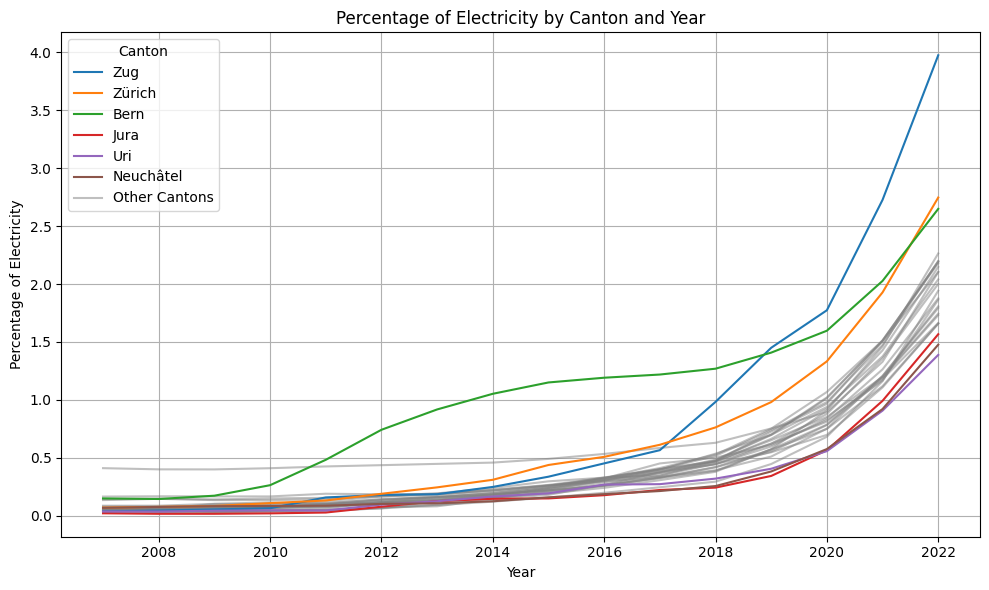

In [35]:
# Define the cantons to highlight in color
highlight_cantons = ["Zug", "Zürich", "Bern", "Jura", "Uri","Neuchâtel"]  # Updated highlight_cantons

# Pivot to create canton_percentage_by_year_2010
canton_percentage_by_year_2010 = electricity_percentage_by_canton_year_2010.pivot(
    index='Year', columns='Canton', values='Percentage'
)


# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Plot all cantons in grey without adding them to the legend
for column in canton_percentage_by_year_2010.columns:
    if column not in highlight_cantons:
        canton_percentage_by_year_2010[column].plot(kind='line', ax=ax, color='grey', alpha=0.5)

# Plot highlighted cantons in color
for canton in highlight_cantons:
    if canton in canton_percentage_by_year_2010.columns:  # Check if canton is present in data
        canton_percentage_by_year_2010[canton].plot(kind='line', ax=ax, label=canton)

# Add a dummy line for "Other Cantons" to the legend
other_canton_line = ax.plot([], [], color='grey', alpha=0.5, label='Other Cantons')[0]  # Get the line object

# Get handles and labels for the legend
handles, labels = ax.get_legend_handles_labels()

# Filter handles and labels to keep only desired entries
desired_labels = highlight_cantons + ['Other Cantons']
desired_handles = [h for h, l in zip(handles, labels) if l in desired_labels]
desired_labels = [l for l in labels if l in desired_labels]  # Keep original order

# Create the legend with filtered handles and labels
plt.legend(desired_handles, desired_labels, title='Canton')

plt.xlabel('Year')
plt.ylabel('Percentage of Electricity')
plt.title('Percentage of Electricity by Canton and Year')
plt.grid(True)  # Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [36]:
# Filter for the year 2024
data_2024 = electricity_percentage_by_canton_year_2010[electricity_percentage_by_canton_year_2010['Year'] == 2024]

# Sort by Percentage in ascending order and get the top 2 unique cantons
lowest_cantons_2024 = data_2024.sort_values(by='Percentage', ascending=True)['Canton'].unique()[:2].tolist()

print(f"Cantons with the lowest percentage in 2024: {lowest_cantons_2024}")

Cantons with the lowest percentage in 2024: []


In [56]:
# Define the list of cantons to keep
selected_cantons = ["Zürich", "Zug", "Bern", "Jura", "Uri", "Neuchâtel"]

# Filter the DataFrame
filtered_data = electricity_percentage_by_year_by_canton[electricity_percentage_by_year_by_canton['Canton'].isin(selected_cantons)]

# Display the result
print(filtered_data)

      Year  Canton  Percentage
769   2007    Bern    0.148691
773   2008    Bern    0.143655
777   2009    Bern    0.172249
781   2010    Bern    0.262932
785   2011    Bern    0.482082
...    ...     ...         ...
3613  2018  Zürich    0.761876
3617  2019  Zürich    0.980527
3621  2020  Zürich    1.332480
3625  2021  Zürich    1.927696
3629  2022  Zürich    2.746738

[96 rows x 3 columns]


## Air quality in Switzerland

In [37]:
url = "https://raw.githubusercontent.com/Udzf/EV/main/emissions_data.csv"  # Direct link to raw content
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content to string
emissions_data = pd.read_csv(io.StringIO(data))

In [38]:
print(emissions_data.head())

   year  C02 due to transport (in tonne)  \
0  1990                             14.6   
1  1991                             15.1   
2  1992                             15.4   
3  1993                             14.3   
4  1994                             14.5   

   Emission of N02 due to transport in 1000 tonne  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

   PM 10 due to transport in tonne  NMVOCs due to transport in 1000 tonne  
0                              NaN                                    NaN  
1                              NaN                                    NaN  
2                              NaN                                    NaN  
3                              NaN                                    NaN  
4                              NaN  

In [39]:
filtered_emissions_data = emissions_data[emissions_data['year'] >= 2000]

In [40]:
filtered_emissions_data2 = filtered_emissions_data[filtered_emissions_data['year'] != 2023]

In [41]:
print(filtered_emissions_data2)

    year  C02 due to transport (in tonne)  \
10  2000                             15.8   
11  2001                             15.5   
12  2002                             15.5   
13  2003                             15.6   
14  2004                             15.8   
15  2005                             15.9   
16  2006                             16.0   
17  2007                             16.3   
18  2008                             16.6   
19  2009                             16.4   
20  2010                             16.3   
21  2011                             16.1   
22  2012                             16.3   
23  2013                             16.2   
24  2014                             16.1   
25  2015                             15.3   
26  2016                             15.2   
27  2017                             14.9   
28  2018                             14.9   
29  2019                             14.8   
30  2020                             13.5   
31  2021  

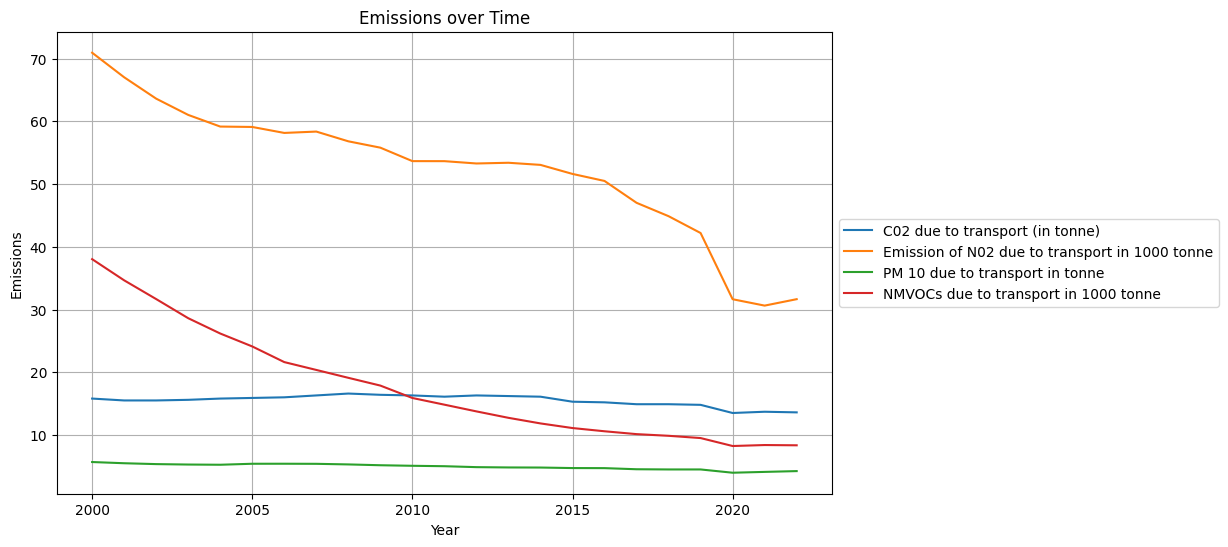

In [42]:
import matplotlib.pyplot as plt

# Assuming 'filtered_emissions_data2' is your DataFrame

# Set 'year' as the index for easier plotting
filtered_emissions_data2 = filtered_emissions_data2.set_index('year')

# Plot all columns except 'year'
filtered_emissions_data2.plot(figsize=(10, 6))  # Adjust figsize as needed

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Emissions')  # You might need to adjust the label based on your data
plt.title('Emissions over Time')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
plt.show()

In [43]:
filtered_emissions_data2 = filtered_emissions_data2.rename(columns={'year': 'Year'})

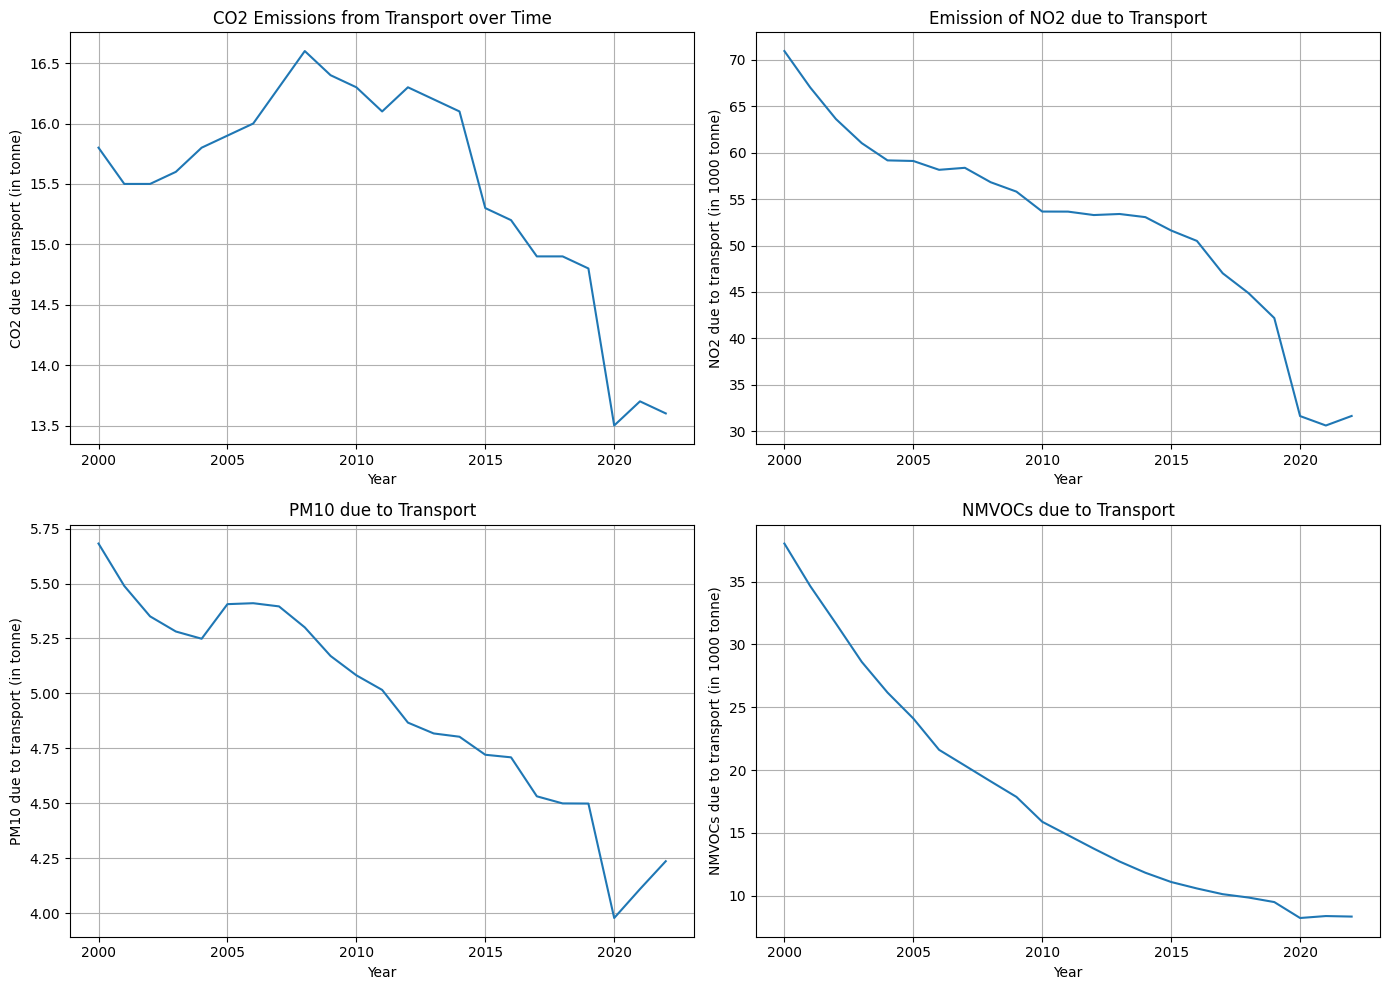

In [44]:
import matplotlib.pyplot as plt

# Assuming 'filtered_emissions_data2' is your DataFrame

# Set 'year' as the index (only once)
if 'year' in filtered_emissions_data2.columns:
    filtered_emissions_data2 = filtered_emissions_data2.set_index('year')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First plot - CO2 emissions
axes[0, 0].plot(filtered_emissions_data2.index, filtered_emissions_data2['C02 due to transport (in tonne)'])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 due to transport (in tonne)')
axes[0, 0].set_title('CO2 Emissions from Transport over Time')
axes[0, 0].grid(True)

# Second plot - NO2 emissions
axes[0, 1].plot(filtered_emissions_data2.index, filtered_emissions_data2['Emission of N02 due to transport in 1000 tonne'])
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('NO2 due to transport (in 1000 tonne)')
axes[0, 1].set_title('Emission of NO2 due to Transport')
axes[0, 1].grid(True)

# Third plot - PM10 emissions
axes[1, 0].plot(filtered_emissions_data2.index, filtered_emissions_data2['PM 10 due to transport in tonne'])
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('PM10 due to transport (in tonne)')
axes[1, 0].set_title('PM10 due to Transport')
axes[1, 0].grid(True)

# Fourth plot - NMVOCs emissions
axes[1, 1].plot(filtered_emissions_data2.index, filtered_emissions_data2['NMVOCs due to transport in 1000 tonne'])
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('NMVOCs due to transport (in 1000 tonne)')
axes[1, 1].set_title('NMVOCs due to Transport')
axes[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Air quality per Canton

In [45]:
import requests
url = "https://raw.githubusercontent.com/Udzf/EV/main/air_quality_per_canton.csv"  # Raw content URL for CSV file
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content using UTF-8
air_quality_per_canton = pd.read_csv(io.StringIO(data))

# Display the first few rows of the DataFrame
print(air_quality_per_canton.head())

  Canton  Year  PM 10   NO2
0    Zug  2007   20.4  32.2
1    Zug  2008   19.6  33.5
2    Zug  2009   20.6  33.3
3    Zug  2010   22.7  33.7
4    Zug  2011   23.8  31.7


In [58]:
# Merge the DataFrames on 'Year' and 'Canton'
merged_data3 = pd.merge(filtered_data, air_quality_per_canton, on=['Year', 'Canton'], how='inner')

# Display the first few rows of the merged DataFrame
print(merged_data3.head())

   Year Canton  Percentage  PM 10   NO2
0  2007   Bern    0.148691   25.0  30.9
1  2008   Bern    0.143655   24.8  30.2
2  2009   Bern    0.172249   26.3  30.9
3  2010   Bern    0.262932   23.4  29.4
4  2011   Bern    0.482082   24.8  27.4


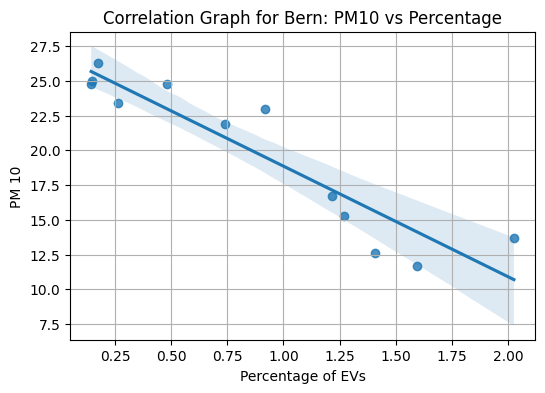

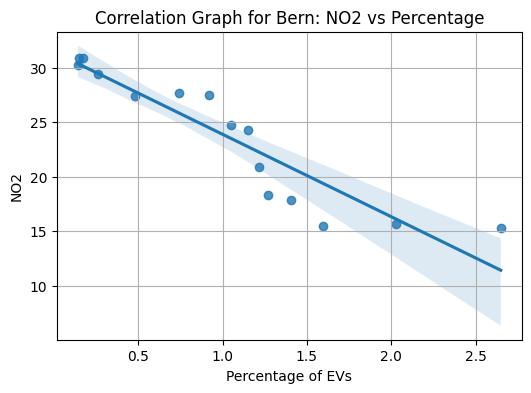

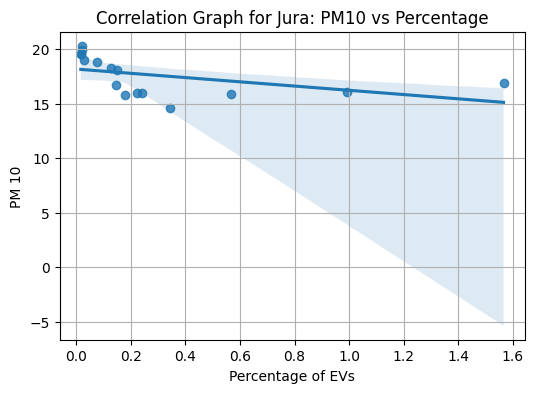

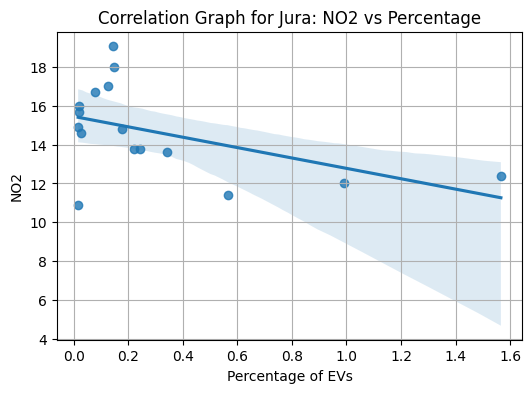

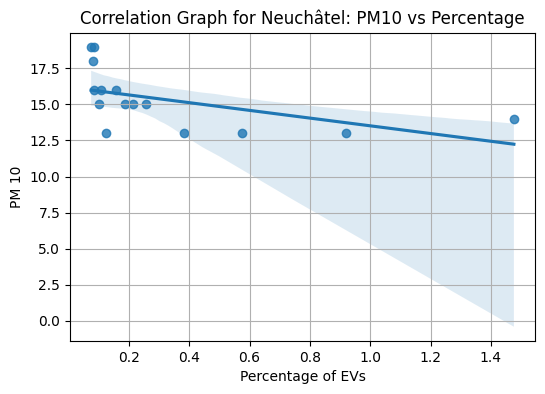

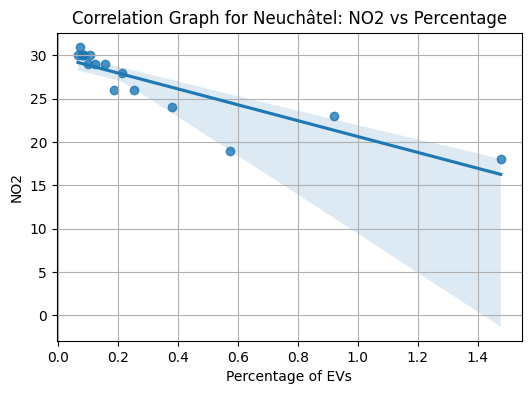

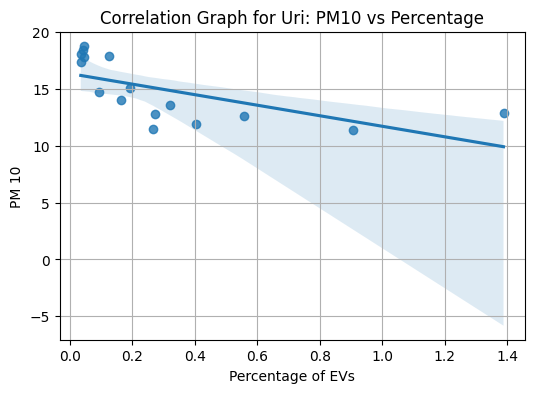

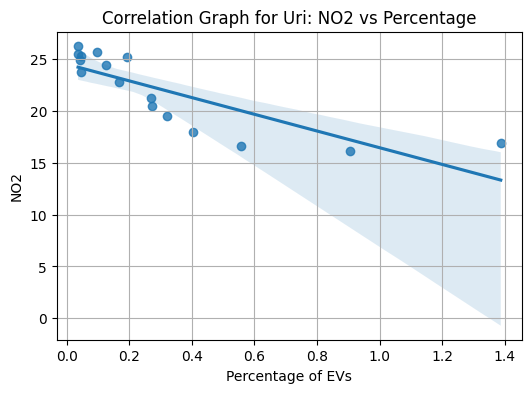

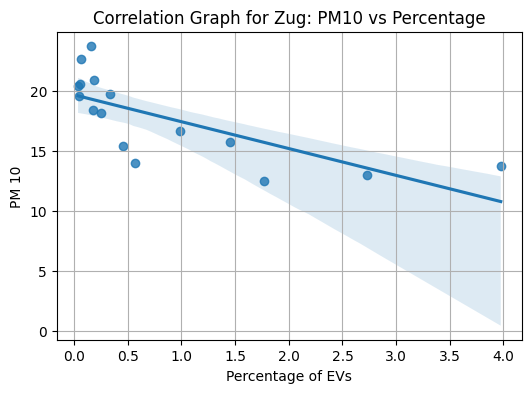

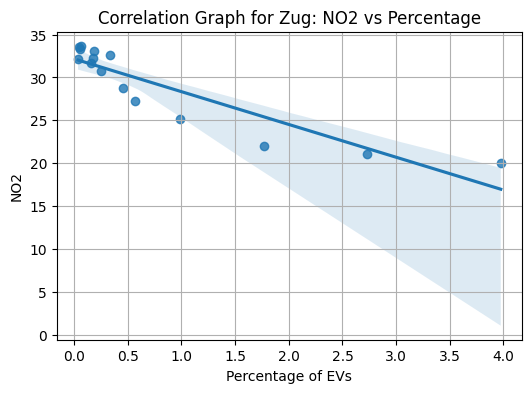

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by canton
grouped_data = merged_data3.groupby('Canton')

# Function to plot correlation graph
def plot_correlation_graph(data, pollutant, title):
    plt.figure(figsize=(6, 4))  # Adjust figsize as needed
    sns.regplot(x='Percentage', y=pollutant, data=data)  # Use regplot for scatter with trend line
    plt.title(title)
    plt.xlabel('Percentage of EVs')
    plt.ylabel(pollutant)
    plt.grid(True)
    plt.show()

# Iterate through cantons and plot graphs
for canton, data in grouped_data:
    plot_correlation_graph(data, 'PM 10', f'Correlation Graph for {canton}: PM10 vs Percentage')
    plot_correlation_graph(data, 'NO2', f'Correlation Graph for {canton}: NO2 vs Percentage')

# Correlation between EV and air quality in Switzerland

In [46]:
# Reset index if 'year' is the index in filtered_emissions_data2
if filtered_emissions_data2.index.name == 'year':
    filtered_emissions_data2 = filtered_emissions_data2.reset_index()

# Rename 'Year' to 'year' in electricity_sums_by_year
electricity_sums_by_year = electricity_sums_by_year.rename(columns={'Year': 'year'})

# Convert 'year' to int in both DataFrames
filtered_emissions_data2['year'] = filtered_emissions_data2['year'].astype(int)
electricity_sums_by_year['year'] = electricity_sums_by_year['year'].astype(int)

# Merge
merged_data = pd.merge(filtered_emissions_data2, electricity_sums_by_year, on='year', how='left')

In [47]:
print(merged_data)

    year  C02 due to transport (in tonne)  \
0   2000                             15.8   
1   2001                             15.5   
2   2002                             15.5   
3   2003                             15.6   
4   2004                             15.8   
5   2005                             15.9   
6   2006                             16.0   
7   2007                             16.3   
8   2008                             16.6   
9   2009                             16.4   
10  2010                             16.3   
11  2011                             16.1   
12  2012                             16.3   
13  2013                             16.2   
14  2014                             16.1   
15  2015                             15.3   
16  2016                             15.2   
17  2017                             14.9   
18  2018                             14.9   
19  2019                             14.8   
20  2020                             13.5   
21  2021  

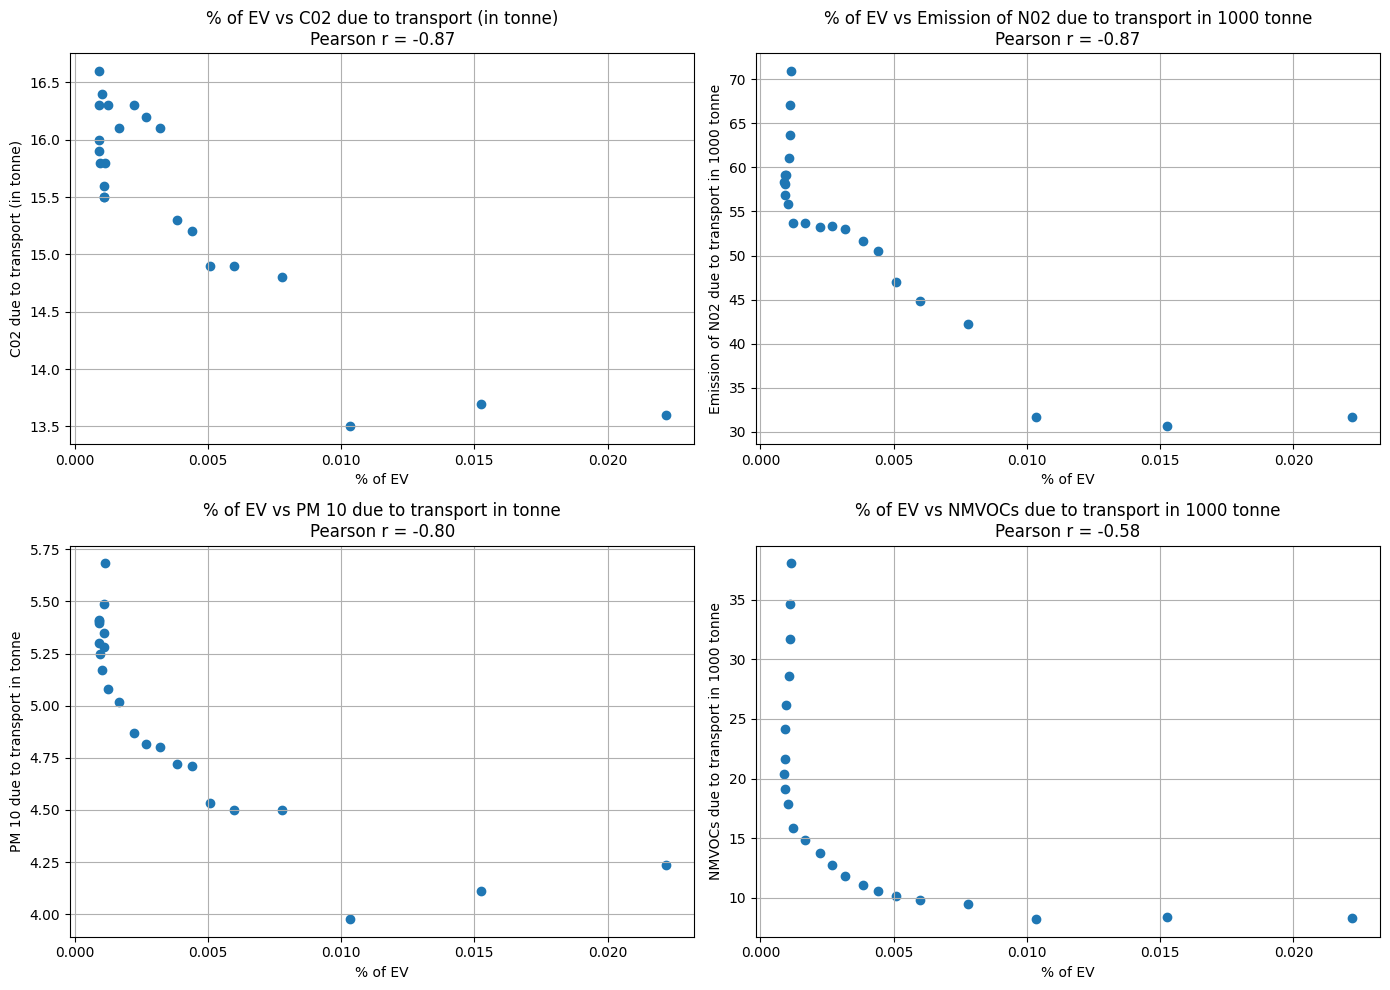

In [48]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# List of target emission columns
target_columns = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop over each target emission column
for idx, col in enumerate(target_columns):
    ax = axes[idx]
    # Scatter plot
    ax.scatter(merged_data['% of EV'], merged_data[col])
    # Calculate Pearson correlation
    corr_coef, _ = pearsonr(merged_data['% of EV'], merged_data[col])
    # Plot title with correlation coefficient
    ax.set_title(f'% of EV vs {col}\nPearson r = {corr_coef:.2f}')
    ax.set_xlabel('% of EV')
    ax.set_ylabel(col)
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

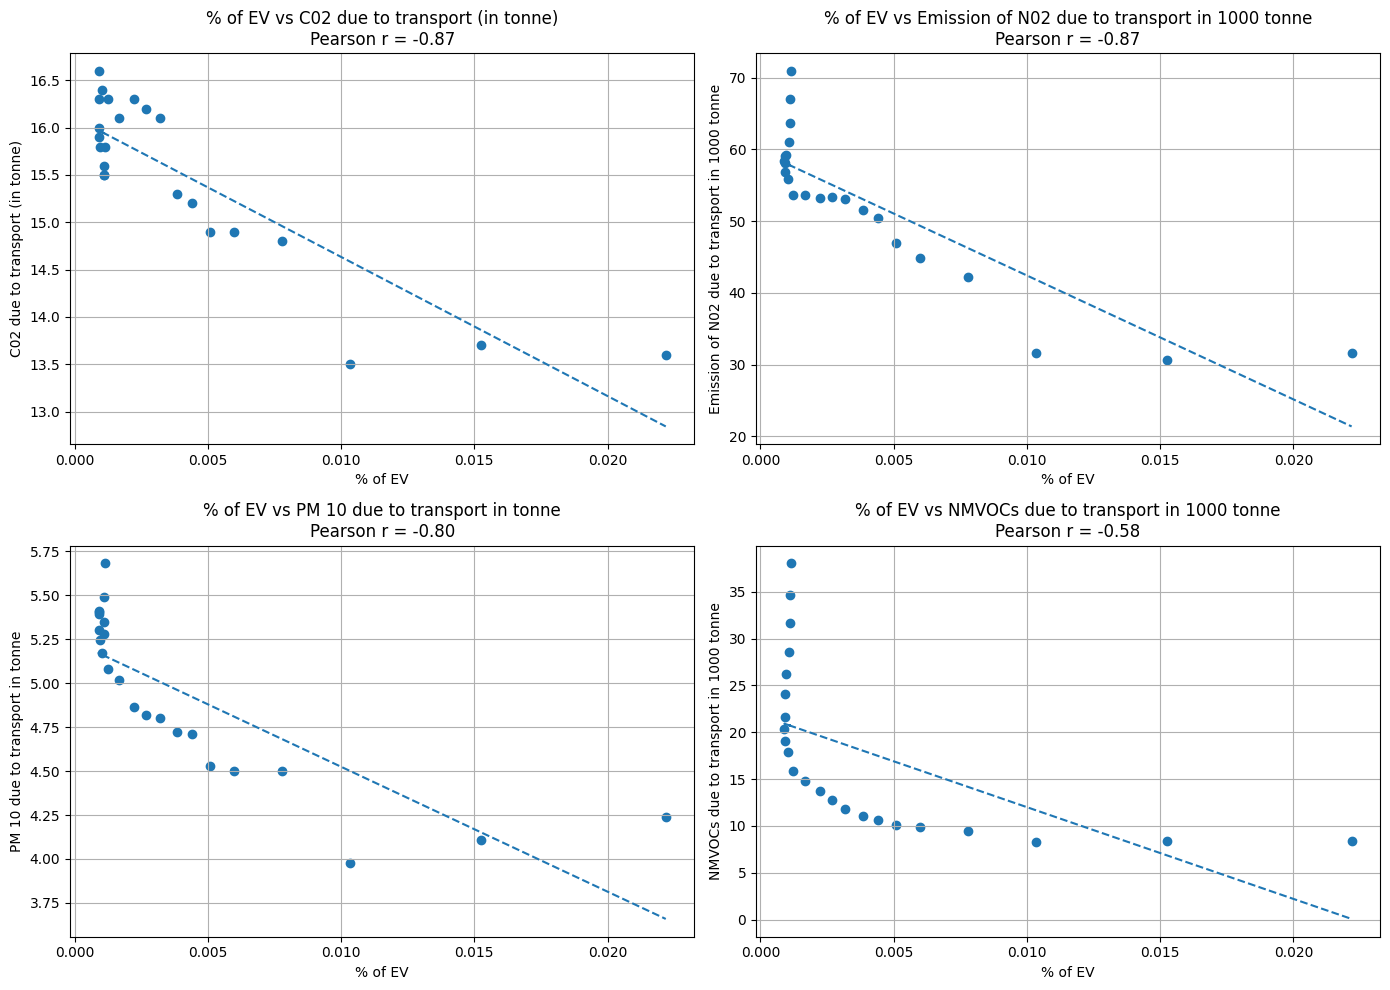

In [49]:
import matplotlib.pyplot as plt
import numpy as np  # <-- you need numpy for line fitting
from scipy.stats import pearsonr

# List of target emission columns
target_columns = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop over each target emission column
for idx, col in enumerate(target_columns):
    ax = axes[idx]
    x = merged_data['% of EV']
    y = merged_data[col]

    # Scatter plot
    ax.scatter(x, y)

    # Calculate Pearson correlation
    corr_coef, _ = pearsonr(x, y)

    # Fit and plot trend line
    m, b = np.polyfit(x, y, 1)  # 1 = linear
    ax.plot(x, m*x + b, linestyle='--')  # Dashed line for the trend

    # Plot title with correlation coefficient
    ax.set_title(f'% of EV vs {col}\nPearson r = {corr_coef:.2f}')
    ax.set_xlabel('% of EV')
    ax.set_ylabel(col)
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Features and target
X = merged_data[['% of EV']]  # Feature (independent variable)

targets = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

for target in targets:
    y = merged_data[target]  # Target (dependent variable)

    # Initialize and fit model
    model = LinearRegression()
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Evaluation
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Print results
    print(f"Predicting {target}:")
    print(f"   R² Score: {r2:.2f}")
    print(f"   RMSE: {rmse:.2f}")
    print()

Predicting C02 due to transport (in tonne):
   R² Score: 0.75
   RMSE: 0.44

Predicting Emission of N02 due to transport in 1000 tonne:
   R² Score: 0.75
   RMSE: 5.20

Predicting PM 10 due to transport in tonne:
   R² Score: 0.64
   RMSE: 0.28

Predicting NMVOCs due to transport in 1000 tonne:
   R² Score: 0.34
   RMSE: 7.17



In [51]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS # Import PanelOLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd



# Define dependent variable
Y = merged_data[targets[0]]  # Target (dependent variable)


# Define independent variable using log-transformed 'Income'
X = merged_data[['% of EV']]


# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X)
results = model.fit(cov_type='robust')
# Create a DataFrame with parameters and p-values
results_table = pd.DataFrame({'Parameter': results.params, 'P-value': results.pvalues})

# Display the table
display(results_table)
# Print R-squared
print(f"R-squared: {results.rsquared}")

ValueError: Series can only be used with a 2-level MultiIndex

In [ ]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS # Import PanelOLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd



# Define dependent variable
Y = merged_data[targets[1]]  # Target (dependent variable)


# Define independent variable using log-transformed 'Income'
X = merged_data[['% of EV']]


# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X)
results = model.fit(cov_type='robust')
# Create a DataFrame with parameters and p-values
results_table = pd.DataFrame({'Parameter': results.params, 'P-value': results.pvalues})

# Display the table
display(results_table)
# Print R-squared
print(f"R-squared: {results.rsquared}")

In [ ]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS # Import PanelOLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd



# Define dependent variable
Y = merged_data[targets[2]]  # Target (dependent variable)


# Define independent variable using log-transformed 'Income'
X = merged_data[['% of EV']]


# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X)
results = model.fit(cov_type='robust')
# Create a DataFrame with parameters and p-values
results_table = pd.DataFrame({'Parameter': results.params, 'P-value': results.pvalues})

# Display the table
display(results_table)
# Print R-squared
print(f"R-squared: {results.rsquared}")

In [ ]:
import statsmodels.api as sm
from linearmodels.panel import PanelOLS # Import PanelOLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd



# Define dependent variable
Y = merged_data[targets[3]]  # Target (dependent variable)


# Define independent variable using log-transformed 'Income'
X = merged_data[['% of EV']]


# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X)
results = model.fit(cov_type='robust')
# Create a DataFrame with parameters and p-values
results_table = pd.DataFrame({'Parameter': results.params, 'P-value': results.pvalues})

# Display the table
display(results_table)
# Print R-squared
print(f"R-squared: {results.rsquared}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Define the pollutants you want to analyze
targets = [
    'C02 due to transport (in tonne)',
    'Emission of N02 due to transport in 1000 tonne',
    'PM 10 due to transport in tonne',
    'NMVOCs due to transport in 1000 tonne'
]

# Initialize PolynomialFeatures object
poly = PolynomialFeatures(degree=2)

# Define the function FIRST
def analyze_pollutants(data, feature='% of EV'):
    for target in targets:
        X = data[[feature]].values
        y = data[target].values

        # Linear Regression
        model_linear = LinearRegression()
        model_linear.fit(X, y)
        y_pred_linear = model_linear.predict(X)

        r2_linear = r2_score(y, y_pred_linear)
        rmse_linear = np.sqrt(mean_squared_error(y, y_pred_linear))

        # Polynomial Regression (degree 2)
        X_poly = poly.fit_transform(X)
        model_poly = LinearRegression()
        model_poly.fit(X_poly, y)
        y_pred_poly = model_poly.predict(X_poly)

        r2_poly = r2_score(y, y_pred_poly)
        rmse_poly = np.sqrt(mean_squared_error(y, y_pred_poly))

        # Print results
        print(f"Results for {target}:")
        print(f"  Linear R^2: {r2_linear:.3f}, RMSE: {rmse_linear:.3f}, Slope: {model_linear.coef_[0]:.3f}")
        print(f"  Polynomial R^2: {r2_poly:.3f}, RMSE: {rmse_poly:.3f}")
        print("\n")

        # Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(X, y, label='Data Points')
        plt.plot(X, y_pred_linear, label='Linear Fit', linestyle='--')
        plt.plot(X, y_pred_poly, label='Polynomial Fit (Degree 2)', linestyle='-')
        plt.title(f'% EV vs {target}')
        plt.xlabel('% of EV')
        plt.ylabel(target)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ✅ NOW you call the function
analyze_pollutants(merged_data)

In [ ]:
merged_data.columns

# Correlation between EV and air quality per canton

# Multivariable OLS


In [ ]:
import requests
import pandas as pd
import io

url = "https://github.com/Udzf/EV/raw/main/df_data.csv"  # Raw content URL for CSV file
response = requests.get(url)
data = response.content.decode('utf-8')  # Decode content using UTF-8
df_data = pd.read_csv(io.StringIO(data))

# Display the first few rows of the DataFrame
print(df_data.head())

In [ ]:
# Merge the DataFrames on 'year'
merged_data2 = pd.merge(filtered_emissions_data2, df_data, on='year', how='left')

# Display the first few rows of the merged DataFrame
print(merged_data2.head())

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming you have already loaded and merged your data into merged_data2

# Define the formula for the OLS model
formula = 'Q("C02 due to transport (in tonne)") ~ Q("% of EV") + Q("% of diesel in CH") + Q("The share (in %) of public transport in total motorized passenger transport") + Q("Precipitation per year in mm") '


# Fit the OLS model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Display results
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","The share (in %) of public transport in total motorized passenger transport",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("PM 10 due to transport in tonne") ~ Q("% of EV") + Q("% of diesel in CH") + Q("The share (in %) of public transport in total motorized passenger transport") + Q("Precipitation per year in mm")'

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","The share (in %) of public transport in total motorized passenger transport",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("Emission of N02 due to transport in 1000 tonne") ~ Q("% of EV") + Q("Number of vehicles register in CH") + Q("Precipitation per year in mm") + Q("Covid 19") '

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","Covid 19",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
import statsmodels.formula.api as smf

# Define the formula with Covid Dummy added
formula = 'Q("NMVOCs due to transport in 1000 tonne") ~ Q("% of EV") + Q("Number of vehicles register in CH") + Q("Precipitation per year in mm") + Q("Covid 19") '

# Fit the model
model = smf.ols(formula=formula, data=merged_data2).fit()

# Print summary
print(model.summary())

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "Number of vehicles register in CH","The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # ← this is the correct module for add_constant

X = merged_data2[[
    "% of EV",
    "% of diesel in CH","The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature", "Covid 19",
    "Precipitation per year in mm"
]]

X = sm.add_constant(X)  # ✅ Correct usage here

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric predictor columns you're using
columns_of_interest = [
    "% of EV","Number of vehicles register in CH",
    "The share (in %) of public transport in total motorized passenger transport",
    "Winter average temperature",
    "Precipitation per year in mm"
]

# Create correlation matrix
correlation_matrix = merged_data2[columns_of_interest].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Predictors")
plt.show()